# Evaluation of the system with the top ids already generated

- Lyrics Features used
    - tfidf
    - word2vec

- Audio Features used
    - mfcc bow
    - essentia
    - blf delta spectral
    
-  Video Features used
    - incp
    - vgg19

- Combinations of [Lyrics][Audio][Video]

    - tfidf-mfccbow-incp
    - bert-mfccbow-incp

    - tfidf_essentia_incp
    - bert-essentia-incp

    - tfidf-blfdeltaspectral-incp
    - bert-blfdeltaspectral-incp

    - tfidf-mfccbow-vgg19
    - bert-mfccbow-vgg19

    - tfidf_essentia_vgg19
    - bert-essentia-vgg19

    - tfidf-blfdeltaspectral-vgg19
    - bert-blfdeltaspectral-vgg19

In [1]:
import pandas as pd
import numpy as np
from os.path import exists
from tqdm import tqdm
import re
import datatable as dt
from matplotlib import pyplot as plt

In [2]:
# DATA FILES PROVIDED Task 2
file_genres_2   = "./../task2/id_genres_mmsr.tsv"
file_info_2     = "./../task2/id_information_mmsr.tsv"

In [3]:
# Individual Features with jaccard and cosine

f_top_cosine_tfidf    = './TopIdsTask2/top_ids_cosine_tfidf_complete_.csv'
f_top_cosine_word2vec = './TopIdsTask2/top_ids_cosine_word2vec_complete_.csv'
f_top_cosine_mfcc_bow = './TopIdsTask2/top_ids_cosine_mfcc_bow_complete_.csv'
f_top_cosine_essentia = './TopIdsTask2/top_ids_cosine_essentia_complete_.csv'
f_top_cosine_incp     = './TopIdsTask2/top_ids_cosine_incp_complete_.csv'
f_top_cosine_vgg19    = './TopIdsTask2/top_ids_cosine_vgg19_complete_.csv'
f_top_cosine_blf_delta_spectral = 'top_ids_cosine_blf_deltaspectral_complete_.csv'

f_top_jaccard_tfidf    = './TopIdsTask2/top_ids_jaccard_tfidf_complete.csv'
f_top_jaccard_word2vec = './TopIdsTask2/top_ids_jaccard_word2vec_complete.csv'
f_top_jaccard_mfcc_bow = './TopIdsTask2/top_ids_jaccard_mfcc_bow_complete.csv'
f_top_jaccard_essentia = './TopIdsTask2/top_ids_jaccard_essentia_complete.csv'
f_top_jaccard_incp     = './TopIdsTask2/top_ids_jaccard_incp_complete.csv'
f_top_jaccard_vgg19    = './TopIdsTask2/top_ids_jaccard_vgg19_complete.csv'
f_top_jaccard_blf_delta_spectral = './TopIdsTask2/top_ids_jaccard_blf_spectralcontrast_complete.csv'

# Features combined [Lyrics] [Audio] [Video] with Jaccard and cosine

f_top_cosine_tfidf_mfcc_bow_incp  = './TopIdsTask2/top_ids_cosine_tfidf_mfcc_bow_incp_complete.csv'
f_top_cosine_tfidf_mfcc_bow_vgg19 = './TopIdsTask2/top_ids_cosine_tfidf_mfcc_bow_vgg19_complete.csv'
f_top_cosine_tfidf_essentia_incp  = './TopIdsTask2/top_ids_cosine_tfidf_essentia_incp_complete.csv'
f_top_cosine_tfidf_essentia_vgg19 = './TopIdsTask2/top_ids_cosine_tfidf_essentia_vgg19_complete.csv'
f_top_cosine_tfidf_blf_delta_spectral_incp  = './TopIdsTask2/top_ids_cosine_tfidf_blfdeltaspectral_incp_complete.csv'
f_top_cosine_tfidf_blf_delta_spectral_vgg19 = './TopIdsTask2/top_ids_cosine_tfidf_blfdeltaspectral_vgg19_complete.csv'
f_top_cosine_bert_mfcc_bow_incp  = './TopIdsTask2/top_ids_cosine_bert_mfcc_bow_incp_complete.csv'
f_top_cosine_bert_mfcc_bow_vgg19 = './TopIdsTask2/top_ids_cosine_bert_mfcc_bow_vgg19_complete.csv'
f_top_cosine_bert_essentia_incp  = './TopIdsTask2/top_ids_cosine_bert_essentia_incp_complete.csv'
f_top_cosine_bert_essentia_vgg19 = './TopIdsTask2/top_ids_cosine_bert_essentia_vgg19_complete.csv'
f_top_cosine_bert_blf_delta_spectral_incp  = './TopIdsTask2/top_ids_cosine_bert_blfdeltaspectral_incp_complete.csv'
f_top_cosine_bert_blf_delta_spectral_vgg19 = './TopIdsTask2/top_ids_cosine_bert_blfdeltaspectral_vgg19_complete.csv'

f_top_jaccard_tfidf_mfcc_bow_incp  = './TopIdsTask2/top_ids_jaccard_tfidf_mfcc_bow_incp_complete.csv'
f_top_jaccard_tfidf_mfcc_bow_vgg19 = './TopIdsTask2/top_ids_jaccard_tfidf_mfcc_bow_vgg19_complete.csv'
f_top_jaccard_tfidf_essentia_incp  = './TopIdsTask2/top_ids_cosine_tfidf_essentia_incp_complete.csv'
f_top_jaccard_tfidf_essentia_vgg19 = './TopIdsTask2/top_ids_cosine_tfidf_essentia_vgg19_complete.csv'
f_top_jaccard_tfidf_blf_delta_spectral_incp = './TopIdsTask2/top_ids_jaccard_tfidf_blfdeltaspectral_incp_complete.csv'
f_top_jaccard_tfidf_blf_delta_spectral_vgg19 = './TopIdsTask2/top_ids_jaccard_tfidf_blfdeltaspectral_vgg19_complete.csv'
f_top_jaccard_bert_mfcc_bow_incp  = './TopIdsTask2/top_ids_jaccard_bert_mfcc_bow_incp_complete.csv'
f_top_jaccard_bert_mfcc_bow_vgg19 = './TopIdsTask2/top_ids_jaccard_bert_mfcc_bow_vgg19_complete.csv'
f_top_jaccard_bert_essentia_incp  = './TopIdsTask2/top_ids_jaccard_bert_essentia_incp_complete.csv'
f_top_jaccard_bert_essentia_vgg19 = './TopIdsTask2/top_ids_jaccard_bert_essentia_vgg19_complete.csv'
f_top_jaccard_bert_blf_delta_spectral_incp  = './TopIdsTask2/top_ids_jaccard_bert_blfdeltaspectral_incp_complete.csv'
f_top_jaccard_bert_blf_delta_spectral_vgg19 = './TopIdsTask2/top_ids_jaccard_bert_blfdeltaspectral_vgg19_complete.csv'

In [4]:
genres  = dt.fread(file_genres_2).to_pandas()
genres.set_index('id', inplace=True)
# genres.head()

In [ ]:
info  = dt.fread(file_info_2).to_pandas()
info.set_index('id', inplace=True)
# info.head()

In [5]:
top_cosine_tfidf  = dt.fread(f_top_cosine_tfidf, header=True).to_pandas()
top_cosine_tfidf.set_index('index', inplace=True)

In [6]:
top_cosine_word2vec  = dt.fread(f_top_cosine_word2vec, header=True).to_pandas()
top_cosine_word2vec.set_index('index', inplace=True)
top_cosine_mfcc_bow  = dt.fread(f_top_cosine_mfcc_bow, header=True).to_pandas()
top_cosine_mfcc_bow.set_index('index', inplace=True)

In [ ]:
top_cosine_essentia  = dt.fread(f_top_cosine_essentia, header=True).to_pandas()
top_cosine_essentia.set_index('index', inplace=True)
top_cosine_incp  = dt.fread(f_top_cosine_incp, header=True).to_pandas()
top_cosine_incp.set_index('index', inplace=True)

In [ ]:
top_cosine_vgg19  = dt.fread(f_top_cosine_vgg19, header=True).to_pandas()
top_cosine_vgg19.set_index('index', inplace=True)
top_cosine_blf_delta_spectral  = dt.fread(f_top_cosine_blf_delta_spectral, header=True).to_pandas()
top_cosine_blf_delta_spectral.set_index('index', inplace=True)

In [ ]:
top_jaccard_tfidf  = dt.fread(f_top_jaccard_tfidf, header=True).to_pandas()
top_jaccard_tfidf.set_index('index', inplace=True)

In [ ]:
top_jaccard_word2vec  = dt.fread(f_top_jaccard_word2vec, header=True).to_pandas()
top_jaccard_word2vec.set_index('index', inplace=True)
top_jaccard_mfcc_bow  = dt.fread(f_top_jaccard_mfcc_bow, header=True).to_pandas()
top_jaccard_mfcc_bow.set_index('index', inplace=True)

In [ ]:
top_jaccard_essentia  = dt.fread(f_top_jaccard_essentia, header=True).to_pandas()
top_jaccard_essentia.set_index('index', inplace=True)
top_jaccard_incp  = dt.fread(f_top_jaccard_incp, header=True).to_pandas()
top_jaccard_incp.set_index('index', inplace=True)

In [ ]:
top_jaccard_vgg19  = dt.fread(f_top_jaccard_vgg19, header=True).to_pandas()
top_jaccard_vgg19.set_index('index', inplace=True)
top_jaccard_blf_delta_spectral  = dt.fread(f_top_jaccard_blf_delta_spectral, header=True).to_pandas()
top_jaccard_blf_delta_spectral.set_index('index', inplace=True)

In [ ]:
top_cosine_tfidf_mfcc_bow_incp  = dt.fread(f_top_cosine_tfidf_mfcc_bow_incp, header=True).to_pandas()
top_cosine_tfidf_mfcc_bow_incp.set_index('index', inplace=True)
top_cosine_tfidf_mfcc_bow_vgg19  = dt.fread(f_top_cosine_tfidf_mfcc_bow_vgg19, header=True).to_pandas()
top_cosine_tfidf_mfcc_bow_vgg19.set_index('index', inplace=True)

In [ ]:
top_cosine_tfidf_essentia_incp  = dt.fread(f_top_cosine_tfidf_essentia_incp, header=True).to_pandas()
top_cosine_tfidf_essentia_incp.set_index('index', inplace=True)
top_cosine_tfidf_essentia_vgg19  = dt.fread(f_top_cosine_tfidf_essentia_vgg19, header=True).to_pandas()
top_cosine_tfidf_essentia_vgg19.set_index('index', inplace=True)

In [ ]:
top_cosine_tfidf_blf_delta_spectral_incp  = dt.fread(f_top_cosine_tfidf_blf_delta_spectral_incp, header=True).to_pandas()
top_cosine_tfidf_blf_delta_spectral_incp.set_index('index', inplace=True)
top_cosine_tfidf_blf_delta_spectral_vgg19  = dt.fread(f_top_cosine_tfidf_blf_delta_spectral_vgg19, header=True).to_pandas()
top_cosine_tfidf_blf_delta_spectral_vgg19.set_index('index', inplace=True)

In [ ]:
top_cosine_bert_mfcc_bow_incp  = dt.fread(f_top_cosine_bert_mfcc_bow_incp, header=True).to_pandas()
top_cosine_bert_mfcc_bow_incp.set_index('index', inplace=True)
top_cosine_bert_mfcc_bow_vgg19  = dt.fread(f_top_cosine_bert_mfcc_bow_vgg19, header=True).to_pandas()
top_cosine_bert_mfcc_bow_vgg19.set_index('index', inplace=True)

In [ ]:
top_cosine_bert_essentia_incp  = dt.fread(f_top_cosine_bert_essentia_incp, header=True).to_pandas()
top_cosine_bert_essentia_incp.set_index('index', inplace=True)
top_cosine_bert_essentia_vgg19  = dt.fread(f_top_cosine_bert_essentia_vgg19, header=True).to_pandas()
top_cosine_bert_essentia_vgg19.set_index('index', inplace=True)

In [ ]:
top_cosine_bert_blf_delta_spectral_incp  = dt.fread(f_top_cosine_bert_blf_delta_spectral_incp, header=True).to_pandas()
top_cosine_bert_blf_delta_spectral_incp.set_index('index', inplace=True)
top_cosine_bert_blf_delta_spectral_vgg19  = dt.fread(f_top_cosine_bert_blf_delta_spectral_vgg19, header=True).to_pandas()
top_cosine_bert_blf_delta_spectral_vgg19.set_index('index', inplace=True)

In [ ]:
top_jaccard_tfidf_mfcc_bow_incp  = dt.fread(f_top_jaccard_tfidf_mfcc_bow_incp, header=True).to_pandas()
top_jaccard_tfidf_mfcc_bow_incp.set_index('index', inplace=True)
top_jaccard_tfidf_mfcc_bow_vgg19  = dt.fread(f_top_jaccard_tfidf_mfcc_bow_vgg19, header=True).to_pandas()
top_jaccard_tfidf_mfcc_bow_vgg19.set_index('index', inplace=True)

In [ ]:
top_jaccard_tfidf_essentia_incp  = dt.fread(f_top_jaccard_tfidf_essentia_incp, header=True).to_pandas()
top_jaccard_tfidf_essentia_incp.set_index('index', inplace=True)
top_jaccard_tfidf_essentia_vgg19  = dt.fread(f_top_jaccard_tfidf_essentia_vgg19, header=True).to_pandas()
top_jaccard_tfidf_essentia_vgg19.set_index('index', inplace=True)

In [ ]:
top_jaccard_tfidf_blf_delta_spectral_incp  = dt.fread(f_top_jaccard_tfidf_blf_delta_spectral_incp, header=True).to_pandas()
top_jaccard_tfidf_blf_delta_spectral_incp.set_index('index', inplace=True)
top_jaccard_tfidf_blf_delta_spectral_vgg19  = dt.fread(f_top_jaccard_tfidf_blf_delta_spectral_vgg19, header=True).to_pandas()
top_jaccard_tfidf_blf_delta_spectral_vgg19.set_index('index', inplace=True)

In [ ]:
top_jaccard_bert_mfcc_bow_incp  = dt.fread(f_top_jaccard_bert_mfcc_bow_incp, header=True).to_pandas()
top_jaccard_bert_mfcc_bow_incp.set_index('index', inplace=True)
top_jaccard_bert_mfcc_bow_vgg19  = dt.fread(f_top_jaccard_bert_mfcc_bow_vgg19, header=True).to_pandas()
top_jaccard_bert_mfcc_bow_vgg19.set_index('index', inplace=True)

In [ ]:
top_jaccard_bert_essentia_incp  = dt.fread(f_top_jaccard_bert_essentia_incp, header=True).to_pandas()
top_jaccard_bert_essentia_incp.set_index('index', inplace=True)
top_jaccard_bert_essentia_vgg19  = dt.fread(f_top_jaccard_bert_essentia_vgg19, header=True).to_pandas()
top_jaccard_bert_essentia_vgg19.set_index('index', inplace=True)

In [ ]:
top_jaccard_bert_blf_delta_spectral_incp  = dt.fread(f_top_jaccard_bert_blf_delta_spectral_incp, header=True).to_pandas()
top_jaccard_bert_blf_delta_spectral_incp.set_index('index', inplace=True)
top_jaccard_bert_blf_delta_spectral_vgg19  = dt.fread(f_top_jaccard_bert_blf_delta_spectral_vgg19, header=True).to_pandas()
top_jaccard_bert_blf_delta_spectral_vgg19.set_index('index', inplace=True)

## Evaluation metrics

In [7]:
# Check if any genre of the song one is in the genres of song two, if yes returns True
def isResultRelevant(songOneGenres, songTwoGenres):
    return any(item in get_genres(songOneGenres) for item in get_genres(songTwoGenres))

In [8]:
# Helpers for evaluation
def get_genres(field):
    return re.findall(r"\'(.*?)\'", field)

In [ ]:
def ndcgMean(dfTopIds, topNumber):
    ndcg = []

    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        sorted_results = sorted(relevant_results, reverse=True)

        dcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)])
        idcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(sorted_results)])
        
        if idcg == 0: # Case when there is no relevant result in the top@K
            ndcg.append(0)
        else:
            ndcg.append(dcg / idcg)
#         print(dcg, idcg)
    return (ndcg, np.mean(ndcg))

In [ ]:
def meanReciprocalRank(dfTopIds, topNumber):
    RR = []
    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]

        if True in relevant_results:
            min_idx_rel = relevant_results.index(True) + 1
            RR.append(1/min_idx_rel)
        else: # Case when there is no relevant result in the top@K
            RR.append(0)

       
    return np.mean(RR)

In [22]:
def meanAveragePrecision(dfTopIds, topNumber):
    
    AP_ = []
    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        REL = np.sum(relevant_results)
        if REL == 0: # Case when there is no relevant result in the top@K
            AP = 0
        else:
#             AP = (1/REL) * np.sum([relevant_results[i] * (np.sum(relevant_results[:i+1]) / (i+1)) for i in range(topNumber)])
            AP = (1/REL) * np.sum(np.multiply(relevant_results, np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))))
        
        
        AP_.append(AP)
        
    return np.mean(AP_)

In [24]:
# meanAveragePrecision(top_cosine_tfidf.iloc[:200], 100)

In [25]:
def getMetrics(dfTopIds, topNumber):

    RR = []
    AP_ = []
    ndcg = []

    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        sorted_results = sorted(relevant_results, reverse=True)

        # MAP
        REL = np.sum(relevant_results)
        if REL == 0: # Case when there is no relevant result in the top@K
            AP = 0
        else:
            AP = (1/REL) * np.sum(np.multiply(relevant_results, np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))))
        AP_.append(AP)

        # MRR
        if True in relevant_results:
            min_idx_rel = relevant_results.index(True) + 1
            RR.append(1/min_idx_rel)
        else: # Case when there is no relevant result in the top@K
            RR.append(0)

        # NDCG
        dcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)])
        # print([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)])
        idcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(sorted_results)])
        if idcg == 0: # Case when there is no relevant result in the top@K
            ndcg.append(0)
        else:
            ndcg.append(dcg / idcg)
    return (np.mean(AP_), np.mean(RR), np.mean(ndcg))

In [ ]:
meanAveragePrecision(top_cosine_tfidf, 100)

In [ ]:
meanReciprocalRank(top_cosine_tfidf, 100)

In [ ]:
a,b = ndcgMean(top_cosine_tfidf, 100)
print(b)

In [26]:
MAP, MRR, Mean_ndcg = getMetrics(top_cosine_tfidf, 100)
print(MAP, MRR, Mean_ndcg)

100%|████████████████████████████████████| 68641/68641 [03:04<00:00, 371.87it/s]

0.5337171610996247 0.6795536730569883 0.7495106356324637


In [9]:
def Precision(dfTopIds, topNumber):
    
    precision = np.zeros((dfTopIds.shape[0], topNumber))
    recall = np.zeros((dfTopIds.shape[0], topNumber))
    precision_max = np.zeros((dfTopIds.shape[0], topNumber))
    
    for idx,queryId in tqdm(enumerate(dfTopIds.index.values)):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        REL = np.sum(relevant_results)

        if REL != 0: # Case when there is no relevant result in the top@K
#             P[idx] = [(np.sum(relevant_results[:i+1]) / (i+1)) for i in range(topNumber)]
            precision[idx] = np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))
#             R[idx] = [(np.sum(relevant_results[:i+1]) / (REL)) for i in range(topNumber)]
            recall[idx] = np.divide(np.cumsum(relevant_results,axis=0), REL)
            precision_max[idx] = [ np.max(precision[idx,i:]) for i,val in enumerate(precision[idx])]

    return precision, recall, precision_max

In [10]:
# p_, r_, p1, r1= Precision(top_cosine_tfidf.iloc[:500], 100)
p, r, p_max = Precision(top_cosine_tfidf, 100)
p1, r1, p1_max = Precision(top_cosine_word2vec, 100)
p2, r2, p2_max = Precision(top_cosine_mfcc_bow, 100)

68641it [02:51, 400.43it/s]
68641it [02:40, 428.28it/s]
68641it [02:32, 451.19it/s]


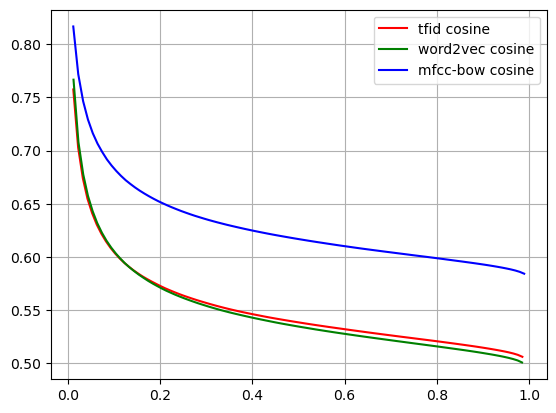

In [12]:
plt.plot(np.mean(r, axis=0), np.mean(p_max, axis=0), color='r', label='tfid cosine')
plt.plot(np.mean(r1, axis=0), np.mean(p1_max, axis=0), color='g', label='word2vec cosine')
plt.plot(np.mean(r2, axis=0), np.mean(p2_max, axis=0), color='b', label='mfcc-bow cosine')
plt.grid()
plt.legend()
plt.show()